In [ ]:
import os
changed_dir = False
if not changed_dir:
    os.chdir("..")
    changed_dir=True

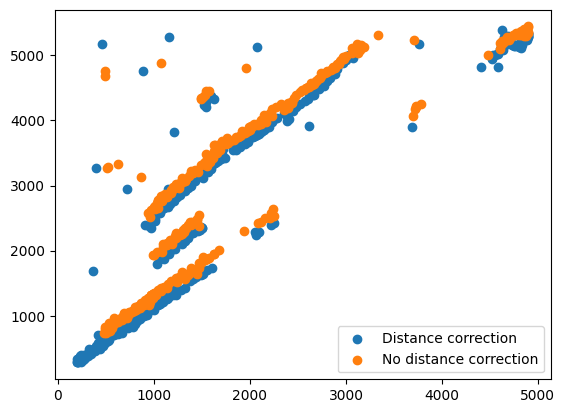

In [6]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

filenames = ["data/calibration/2023-06-25-11:37:05.536372calibration_A2.csv",
             "data/calibration/2023-06-25-11:52:07.646445calibration_A2_no_distance_correction.csv",
            #  "data/calibration/2023-06-25-12:12:40.621004calibration_A2.csv",
            #  "/home/piotr/Documents/mgr/uwb-rs/data-processing/data/movement/2023-06-23-13:58:54.573280slide-4anchors.csv"
             ]
data = []
for filename in filenames:
    df = pd.read_csv(filename)
    df["reference_distance"] *= 10 # cm to mm
    df = df[df["reference_distance"] < 4900]
    # df["reference_distance"] = df["reference_distance"].rolling(window=5).median()
    df.dropna()
    plt.scatter(df["reference_distance"], df["distance"])

plt.legend(["Distance correction", "No distance correction", "Correction (other location)"])
plt.show()

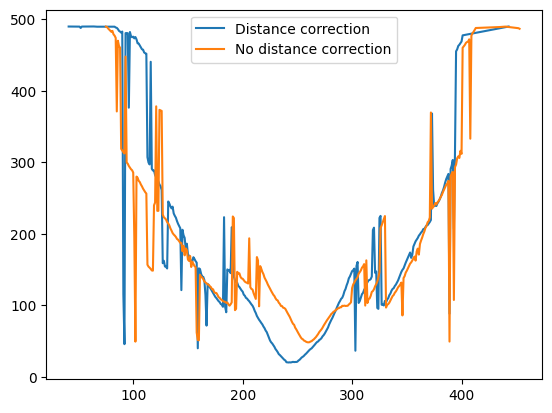

In [7]:
for filename in filenames:
    df = pd.read_csv(filename)
    df = df[df["reference_distance"] < 490]
    # df["reference_distance"] = df["reference_distance"].rolling(window=10).mean()
    plt.plot(df["reference_distance"])

plt.legend(["Distance correction", "No distance correction"])
plt.show()

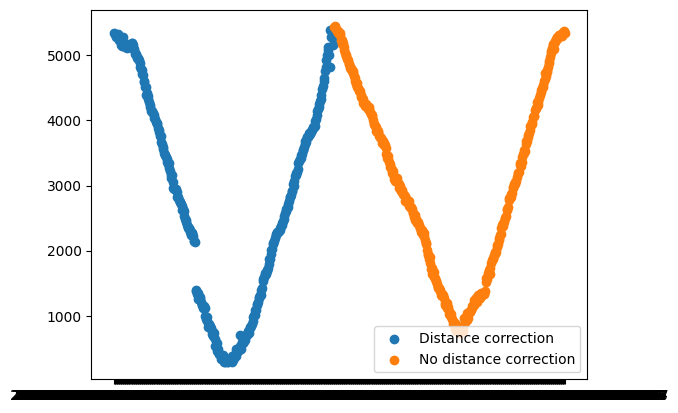

In [8]:
for filename in filenames:
    df = pd.read_csv(filename)
    df = df[df["reference_distance"] < 490]
    # df["reference_distance"] = df["reference_distance"].rolling(window=10).mean()
    # plt.scatter(df["timestamp"], df["distance"])
    plt.scatter(df["timestamp"], df["distance"])

plt.legend(["Distance correction", "No distance correction", "Correction (other location)"])
plt.show()

In [27]:
from pathlib import Path
import pandas as pd

samples_dir = Path("data/p1_1/")
filenames = [f for f in samples_dir.iterdir() if f.name.endswith(".csv")] if samples_dir.is_dir() else [samples_dir]
filenames.sort()
dfs = [pd.read_csv(f) for f in filenames]
for df in dfs:
    df["timestamp"] = pd.to_datetime(df["timestamp"])
all_df = pd.concat(dfs)

In [33]:
from numpy import mean
from datetime import timedelta

def calc_freq(dfs):
    n_samples = sum(len(df) for df in dfs)
    time = sum((df["timestamp"].iloc[-1] - df["timestamp"].iloc[0] for df in dfs), start=timedelta()).total_seconds()
    return n_samples/time

mean_dt = mean([df["timestamp"].diff().mean().to_pytimedelta().microseconds / 1e+6 for df in dfs])
std_mm = all_df[["distance", "anchor"]].groupby("anchor").std()["distance"].mean()

print(f"Mean dt: {mean_dt:.2f}s | freq: {calc_freq(dfs):.2f}Hz")
print(f"Odch std: {std_mm/10:.2f}cm")
print(f"{len(all_df)} samples")

Mean dt: 0.13s | freq: 7.61Hz
Odch std: 2.19cm
13207 samples
